In [1]:
%matplotlib inline
%matplotlib notebook
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%run Methods.ipynb

testAddRankingColumn (__main__.TestRename) ... ok
testClean (__main__.TestRename) ... ok
testCleanValues (__main__.TestRename) ... ok
testEstimateColumn (__main__.TestRename) ... ok
test_rename (__main__.TestRename) ... ok

----------------------------------------------------------------------
Ran 5 tests in 1.478s

OK


In [3]:
pathToData = os.path.join(os.getcwd(), "Data")
pathToGDPTable = os.path.join(pathToData, "GDP Per Capita.xlsx")
pathToRanking = os.path.join(pathToData, "World Innovation Index.csv")

In [4]:
gdpPerCapita = pd.read_excel(pathToGDPTable, index_col = 0)
makeValuesInts(gdpPerCapita)
gdpPerCapita.head(5)

,Country/Territory,UN Region,IMF Estimate,IMF Year,UN Estimate,UN Year,World Bank Estimate,World Bank Year
0,Liechtenstein,Europe,0,0,180227,2020,175814,2019
1,Monaco,Europe,0,0,173696,2020,190513,2019
2,Luxembourg,Europe,135046,2022,117182,2020,115874,2020
3,Bermuda,Americas,0,0,123945,2020,107080,2020
4,Ireland,Europe,101509,2022,86251,2020,85268,2020


In [5]:
innovationRanking = pd.read_csv(pathToRanking)
innovationRanking.head(5)
sorted(innovationRanking['Country Name'].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Pol

In [6]:
countriesInGDPTable = [country for country in gdpPerCapita['Country/Territory']]
countriesInRanking = [country for country in innovationRanking['Country Name']]
inGDPNotInRanking = list(set(countriesInGDPTable) - set(countriesInRanking))
inGDPNotInRanking.sort()
print(list(inGDPNotInRanking))

['Anguilla', 'Bahamas', 'Brunei', 'Cape Verde', 'Congo', 'Cook Islands', 'Curaçao', 'DR Congo', 'East Timor', 'Egypt', 'Eswatini', 'Gambia', 'Hong Kong', 'Iran', 'Ivory Coast', 'Kyrgyzstan', 'Laos', 'Macau', 'Micronesia', 'Montserrat', 'North Korea', 'North Macedonia', 'Palestine', 'Russia', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Sint Maarten', 'Slovakia', 'South Korea', 'Syria', 'São Tomé and Príncipe', 'Taiwan', 'Turks and Caicos Islan', 'Venezuela', 'Yemen', 'Zanzib']


In [7]:
inRakingNotInGDP = list(set(countriesInRanking) - set(countriesInGDPTable))
inRakingNotInGDP.sort()
print(inRakingNotInGDP)

['Bahamas, The', 'Brunei Darussalam', 'Cabo Verde', 'Channel Islands', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Curacao', 'Egypt, Arab Rep.', 'Faroe Islands', 'Gambia, The', 'Gibraltar', 'Iran, Islamic Rep.', 'Isle of Man', 'Korea, Dem. People’s Rep.', 'Korea, Rep.', 'Kyrgyz Republic', 'Lao PDR', 'Macao SAR, China', 'Macedonia, FYR', 'Micronesia, Fed. Sts.', 'Russian Federation', 'Sao Tome and Principe', 'Sint Maarten (Dutch part)', 'Slovak Republic', 'St. Kitts and Nevis', 'St. Lucia', 'St. Martin (French part)', 'St. Vincent and the Grenadines', 'Swaziland', 'Syrian Arab Republic', 'Timor-Leste', 'Turks and Caicos Islands', 'Venezuela, RB', 'Virgin Islands (U.S.)', 'West Bank and Gaza', 'Yemen, Rep.']


In [8]:
countriesToRename = [("Bahamas, The", "Bahamas"), ("Brunei Darussalam", "Brunei"), ("Cabo Verde", "Cape Verde"),
                     ("Curacao", "Curaçao"), ("Congo, Dem. Rep.", "DR Congo"), ("Cote d'Ivoire", "Ivory Coast"),
                     ("Congo, Rep.", "Congo"), ("Egypt, Arab Rep.", "Egypt"), ("Gambia, The", "Gambia"),
                     ("Iran, Islamic Rep.", "Iran"), ("Korea, Dem. People’s Rep.", "North Korea"), ("Korea, Rep.", "South Korea"),
                     ("Kyrgyz Republic", "Kyrgyzstan", "Lao PDR", "Laos"), ("Macao SAR, China", "Macau"), 
                     ('Micronesia, Fed. Sts.', "Micronesia"), ('Russian Federation', "Russia"), ("Sao Tome and Principe",'São Tomé and Príncipe'),
                     ('Sint Maarten (Dutch part)', 'Sint Maarten'), ('Slovak Republic', 'Slovakia'), ('St. Kitts and Nevis', 'Saint Kitts and Nevis'),
                     ('St. Lucia', 'Saint Vincent and the Grenadines'), ('St. Vincent and the Grenadines', 'Saint Vincent and the Grenadines'),
                     ('Syrian Arab Republic', "Syria"), ('Turks and Caicos Islands', 'Turks and Caicos Islan'), ('Venezuela, RB', "Venezuela"),
                     ('West Bank and Gaza', "Palestine"), ('Yemen, Rep.', "Yemen")]
for combo in countriesToRename:
    renameCountry(innovationRanking, combo[0], combo[1])

In [9]:
print(sorted(innovationRanking['Indicator'].unique()))

['Applied tariff rate, weighted mean', 'Assessment in reading, mathematics, and science', 'Audiovisual and related services exports', 'Bahamas', 'Brunei', 'Business environment', 'Business sophistication', 'Cape Verde', 'Citable documents H index', 'Communications, computer and information services imports', 'Congo', 'Cost of redundancy dismissal', 'Country-code top-level domains (ccTLDs)', 'Creative goods and services', 'Creative goods exports', 'Creative outputs', 'Credit', 'Cultural and creative services exports', 'Curaçao', 'DR Congo', 'Daily newspapers circulation', 'Domestic credit to private sector', 'Domestic market scale', 'Ease of getting credit', 'Ease of paying taxes', 'Ease of protecting investors', 'Ease of protecting minority investors', 'Ease of resolving insolvency', 'Ease of starting a business', 'Ecological sustainability', 'Education', 'Egypt', 'Electricity consumption', 'Electricity output', 'Employment in knowledge-intensive services', 'Entertainment and media mar

In [10]:
innovationRanking.loc[(innovationRanking['Indicator'] == "Global Innovation Index") 
                      & (innovationRanking['Subindicator Type'] == "Rank")]

,Country ISO3,Country Name,Indicator Id,Indicator,Subindicator Type,2013,2014,2015,2016,2017,2018,2019,2020
462,AGO,Angola,40711,Global Innovation Index,Rank,135.0,135.0,120.0,NaN,NaN,NaN,NaN,NaN
856,ALB,Albania,40711,Global Innovation Index,Rank,93.0,94.0,87.0,92.0,93.0,83.0,83.0,83.0
1267,ARE,United Arab Emirates,40711,Global Innovation Index,Rank,38.0,36.0,47.0,41.0,35.0,38.0,NaN,NaN
1652,ARG,Argentina,40711,Global Innovation Index,Rank,56.0,70.0,72.0,81.0,76.0,80.0,73.0,80.0
2035,ARM,Armenia,40711,Global Innovation Index,Rank,59.0,65.0,61.0,60.0,59.0,68.0,64.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57480,UZB,Uzbekistan,40711,Global Innovation Index,Rank,133.0,128.0,122.0,NaN,NaN,NaN,NaN,93.0
58432,VNM,Vietnam,40711,Global Innovation Index,Rank,76.0,71.0,52.0,59.0,47.0,45.0,42.0,42.0
59411,ZAF,South Africa,40711,Global Innovation Index,Rank,58.0,53.0,60.0,54.0,57.0,58.0,63.0,60.0
59772,ZMB,Zambia,40711,Global Innovation Index,Rank,118.0,121.0,124.0,125.0,124.0,120.0,124.0,122.0


In [11]:
def globalIndex(indicator, indicatorType):
    """
        Return a data frame with each country's indicator value specified by indicatorType.
    """
    
    return innovationRanking.loc[(innovationRanking['Indicator'] == indicator) 
                      & (innovationRanking['Subindicator Type'] == indicatorType)]

In [12]:
globalInnovationIndexRanking = globalIndex("Global Innovation Index", "Rank")
globalInnovationIndexRanking.head(5)

,Country ISO3,Country Name,Indicator Id,Indicator,Subindicator Type,2013,2014,2015,2016,2017,2018,2019,2020
462,AGO,Angola,40711,Global Innovation Index,Rank,135.0,135.0,120.0,NaN,NaN,NaN,NaN,NaN
856,ALB,Albania,40711,Global Innovation Index,Rank,93.0,94.0,87.0,92.0,93.0,83.0,83.0,83.0
1267,ARE,United Arab Emirates,40711,Global Innovation Index,Rank,38.0,36.0,47.0,41.0,35.0,38.0,NaN,NaN
1652,ARG,Argentina,40711,Global Innovation Index,Rank,56.0,70.0,72.0,81.0,76.0,80.0,73.0,80.0
2035,ARM,Armenia,40711,Global Innovation Index,Rank,59.0,65.0,61.0,60.0,59.0,68.0,64.0,61.0


In [13]:
addRankingColumn(globalInnovationIndexRanking)
globalInnovationIndexRanking.head(5)

C:\Users\14159\AppData\Local\Temp\ipykernel_10248\3478460049.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globalInnovationIndexRanking['Ranking'] = [chooseRanking(twoRanks[0], twoRanks[1]) for twoRanks in zip(globalInnovationIndexRanking['2019'], globalInnovationIndexRanking['2020'])]


,Country ISO3,Country Name,Indicator Id,Indicator,Subindicator Type,2013,2014,2015,2016,2017,2018,2019,2020,Ranking
462,AGO,Angola,40711,Global Innovation Index,Rank,135.0,135.0,120.0,NaN,NaN,NaN,NaN,NaN,200.0
856,ALB,Albania,40711,Global Innovation Index,Rank,93.0,94.0,87.0,92.0,93.0,83.0,83.0,83.0,83.0
1267,ARE,United Arab Emirates,40711,Global Innovation Index,Rank,38.0,36.0,47.0,41.0,35.0,38.0,NaN,NaN,200.0
1652,ARG,Argentina,40711,Global Innovation Index,Rank,56.0,70.0,72.0,81.0,76.0,80.0,73.0,80.0,80.0
2035,ARM,Armenia,40711,Global Innovation Index,Rank,59.0,65.0,61.0,60.0,59.0,68.0,64.0,61.0,61.0


In [14]:
globalInnovationIndexRanking= globalInnovationIndexRanking.rename(columns = {"Country Name": "Country/Territory"})
combinedDF = gdpPerCapita.set_index('Country/Territory').join(globalInnovationIndexRanking[['Country/Territory', 'Ranking']].set_index('Country/Territory'))

In [15]:
combinedDF['Country/Territory'] = combinedDF.index

In [16]:
cellsToClean = [("Taiwan", "UN Year", "2020"),("China", "IMF Year", "2022"), ("China", "UN Year", "2020")
                , ("Tanzania", "UN Year", "2020"), ("Palestine", "IMF Year", "2022")]
cleanFootNoteCells(combinedDF, cellsToClean)

In [17]:
''' Cleaning data : the function above doesn't work, so if you look in data, Tanzania has ]n for one of the years. Look 
    at the table on the webpage, there is a footnote there. 
'''
rowLocation = combinedDF['Country/Territory'].tolist().index("China")
colLocation = [col for col in combinedDF.columns].index("IMF Year")
combinedDF.iat[rowLocation, colLocation]

combinedDF.head()

,UN Region,IMF Estimate,IMF Year,UN Estimate,UN Year,World Bank Estimate,World Bank Year,Ranking,Country/Territory
Country/Territory,,,,,,,,,
Liechtenstein,Europe,0,0,180227,2020,175814,2019,NaN,Liechtenstein
Monaco,Europe,0,0,173696,2020,190513,2019,NaN,Monaco
Luxembourg,Europe,135046,2022,117182,2020,115874,2020,18.0,Luxembourg
Bermuda,Americas,0,0,123945,2020,107080,2020,NaN,Bermuda
Ireland,Europe,101509,2022,86251,2020,85268,2020,15.0,Ireland


In [18]:
createEstimateColumn(combinedDF)
combinedDF.head()

,UN Region,IMF Estimate,IMF Year,UN Estimate,UN Year,World Bank Estimate,World Bank Year,Ranking,Country/Territory,GDP Per Capita
Country/Territory,,,,,,,,,,
Liechtenstein,Europe,0,0,180227,2020,175814,2019,NaN,Liechtenstein,180227
Monaco,Europe,0,0,173696,2020,190513,2019,NaN,Monaco,173696
Luxembourg,Europe,135046,2022,117182,2020,115874,2020,18.0,Luxembourg,135046
Bermuda,Americas,0,0,123945,2020,107080,2020,NaN,Bermuda,123945
Ireland,Europe,101509,2022,86251,2020,85268,2020,15.0,Ireland,101509


In [19]:
combinedDF["GDP Per Capita"] = combinedDF["GDP Per Capita"].apply(pd.to_numeric)
combinedDF.dtypes

UN Region               object
IMF Estimate            object
IMF Year                object
UN Estimate             object
UN Year                 object
World Bank Estimate     object
World Bank Year          int64
Ranking                float64
Country/Territory       object
GDP Per Capita           int64
dtype: object

In [20]:
combinedDF = combinedDF[["Country/Territory", "UN Region", "Ranking", "GDP Per Capita"]]
combinedDF.head()

,Country/Territory,UN Region,Ranking,GDP Per Capita
Country/Territory,,,,
Liechtenstein,Liechtenstein,Europe,NaN,180227
Monaco,Monaco,Europe,NaN,173696
Luxembourg,Luxembourg,Europe,18.0,135046
Bermuda,Bermuda,Americas,NaN,123945
Ireland,Ireland,Europe,15.0,101509


In [21]:
noRanking = [c for c in combinedDF["Country/Territory"] if pd.isna(combinedDF.loc[combinedDF["Country/Territory"] == c, "Ranking"].iat[0])]

In [22]:
combinedDF = combinedDF[combinedDF["Ranking"].notna()]
combinedDF["Ranking"] = combinedDF["Ranking"].apply(pd.to_numeric)
combinedDF.head()

,Country/Territory,UN Region,Ranking,GDP Per Capita
Country/Territory,,,,
Luxembourg,Luxembourg,Europe,18.0,135046
Ireland,Ireland,Europe,15.0,101509
Norway,Norway,Europe,20.0,99481
Switzerland,Switzerland,Europe,1.0,96390
Qatar,Qatar,Asia,70.0,84514


In [23]:
[print(c) for c in combinedDF['UN Region']]

Europe
Europe
Europe
Europe
Asia
Asia
Americas
Europe
Europe
Oceania
Europe
Europe
Americas
Asia
Europe
Europe
Europe
Europe
Asia
Oceania
Europe
Europe
Asia
Asia
Europe
Europe
Europe
Europe
Europe
Asia
Asia
Europe
Europe
Europe
Europe
Asia
Europe
Europe
Europe
Americas
Europe
Americas
Americas
Africa
Europe
Americas
Americas
Americas
Europe
Asia
Asia
Europe
Americas
Americas
Africa
Americas
Americas
Asia
Europe
Europe
Asia
Africa
Americas
Asia
Africa
Asia
Asia
Americas
Africa
Americas
Europe
Americas
Europe
Europe
Americas
Oceania
Americas
Asia
Europe
Asia
Africa
Americas
Europe
Asia
Asia
Americas
Asia
Americas
Africa
Asia
Africa
Africa
Asia
Asia
Africa
Asia
Americas
Americas
Asia
Americas
Asia
Africa
Africa
Africa
Africa
Asia
Asia
Africa
Africa
Asia
Africa
Africa
Africa
Asia
Africa
Africa
Asia
Africa
Africa
Africa
Africa
Africa
Africa
Asia
Africa
Africa
Africa
Africa
Africa
Africa


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

<IPython.core.display.Javascript object>


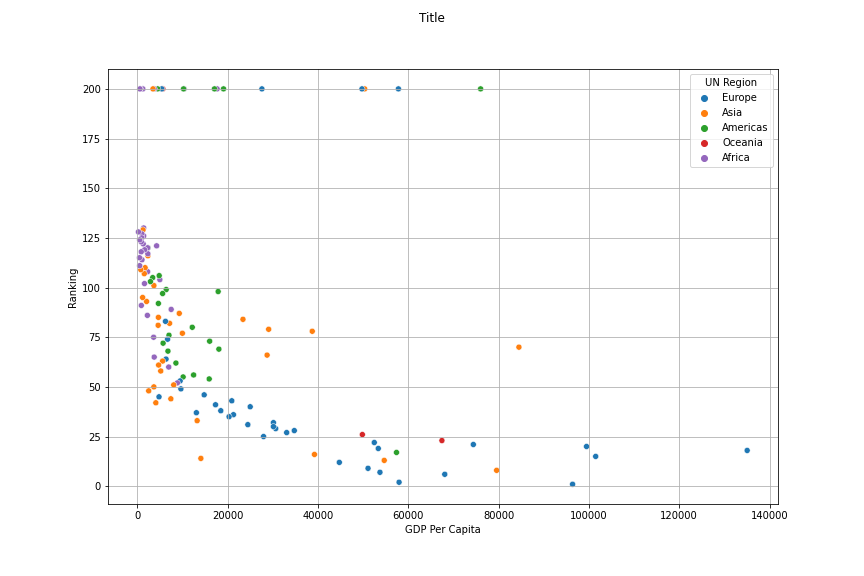

In [24]:
def createScatterPlot():
    fig, ax = plt.subplots()
    
    annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
    annot.set_visible(False)
    gdpVsRankingScatter = sns.scatterplot(data = combinedDF, x = "GDP Per Capita", y = "Ranking", hue = "UN Region")
    sp = plt.gcf()
    sp.set_size_inches(12, 8)
    plt.grid()
    
    countryNames = combinedDF['Country/Territory']
    norm = plt.Normalize(1,4)
    cmap = plt.cm.RdYlGn
    
    def update_annot(ind):

        pos = gdpVsRankingScatter.get_offsets()[ind["ind"][0]]
        annot.xy = pos
        #text = "{}".format(" ".join([countryNames[n] for n in ind["ind"]]))
        text = "green"
        annot.set_text(text)
        #annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
        annot.get_bbox_patch().set_alpha(0.4)


    def hover(event):
        vis = annot.get_visible()
        if event.inaxes == ax:
            cont, ind = gdpVsRankingScatter.contains(event)
            if cont:
                update_annot(ind)
                annot.set_visible(True)
                fig.canvas.draw_idle()
            else:
                if vis:
                    annot.set_visible(False)
                    fig.canvas.draw_idle()

    fig.canvas.mpl_connect("motion_notify_event", hover)
    fig.suptitle("Title")
    plt.show()
createScatterPlot()   

<IPython.core.display.Javascript object>


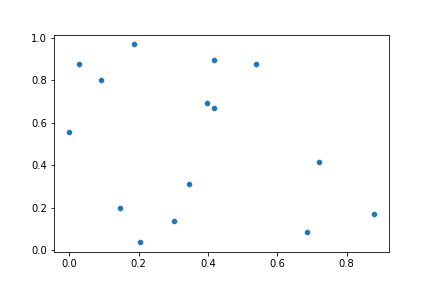

In [25]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)

def example():
    x = np.random.rand(15)
    y = np.random.rand(15)
    names = np.array(list("ABCDEFGHIJKLMNO"))
    c = np.random.randint(1,5,size=15)

    norm = plt.Normalize(1,4)
    cmap = plt.cm.RdYlGn

    fig,ax = plt.subplots()
    sc = sns.scatterplot(x = x, y = y)
    #sc = plt.scatter(x,y,c=c, s=100, cmap=cmap, norm=norm)

    annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                        bbox=dict(boxstyle="round", fc="w"),
                        arrowprops=dict(arrowstyle="->"))
    annot.set_visible(False)

    def update_annot(ind):

        pos = sc.get_offsets()[ind["ind"][0]]
        annot.xy = pos
        #text = "{}".format(" ".join([names[n] for n in ind["ind"]]))
        annot.set_text("green")
        #annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
        annot.get_bbox_patch().set_alpha(0.4)


    def hover(event):
        vis = annot.get_visible()
        if event.inaxes == ax:
            cont, ind = sc.contains(event)
            if cont:
                update_annot(ind)
                annot.set_visible(True)
                fig.canvas.draw_idle()
            else:
                if vis:
                    annot.set_visible(False)
                    fig.canvas.draw_idle()


    fig.canvas.mpl_connect("motion_notify_event", hover)

    plt.show()
example()

<IPython.core.display.Javascript object>


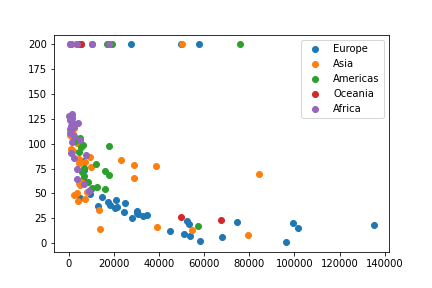

In [28]:
fig, ax = plt.subplots()
for region in combinedDF['UN Region'].unique():
    ax.scatter(x = "GDP Per Capita", y = "Ranking", data = combinedDF[combinedDF['UN Region'] == region],
              label = region)
ax.legend()    